----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

----- Summary Statistics -----
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   

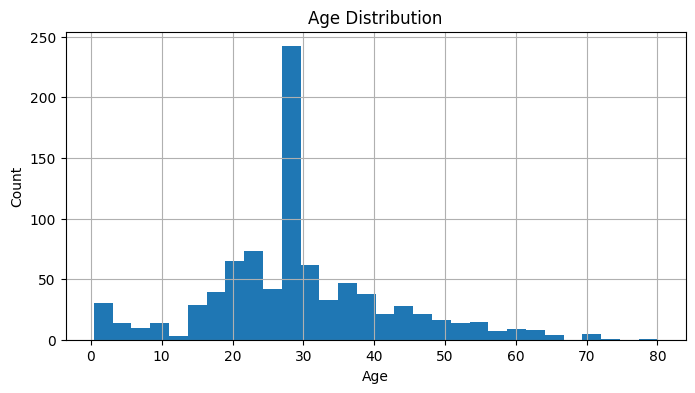

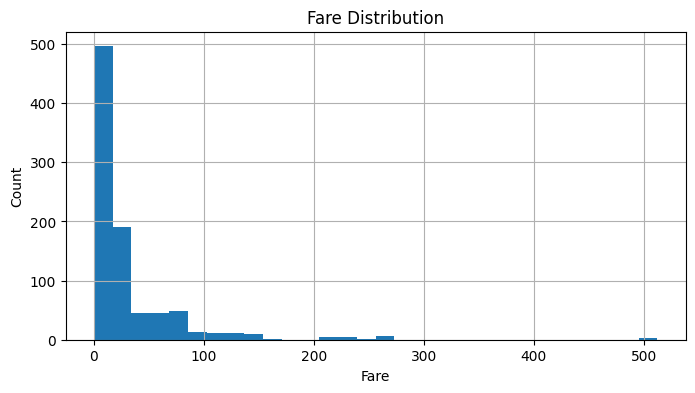

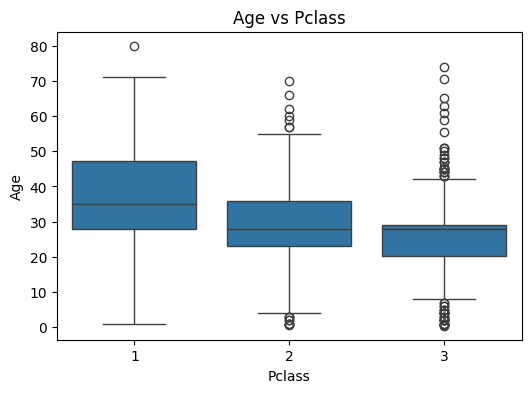

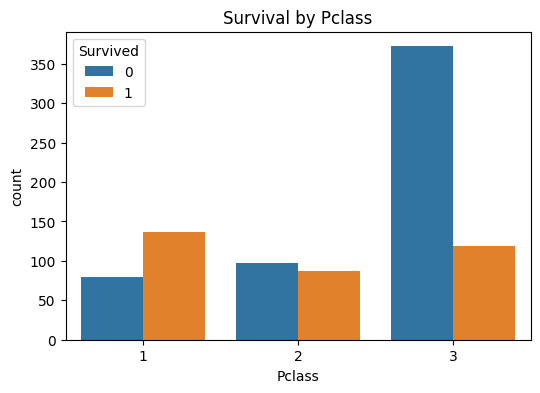

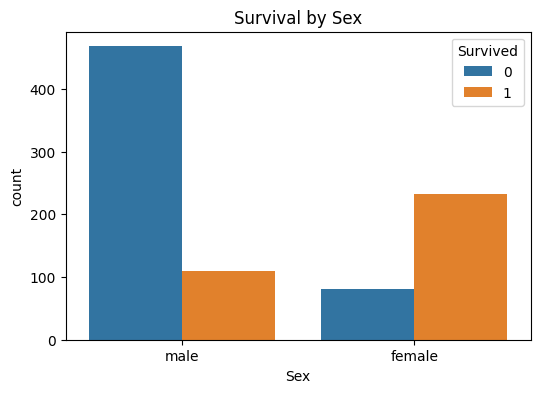

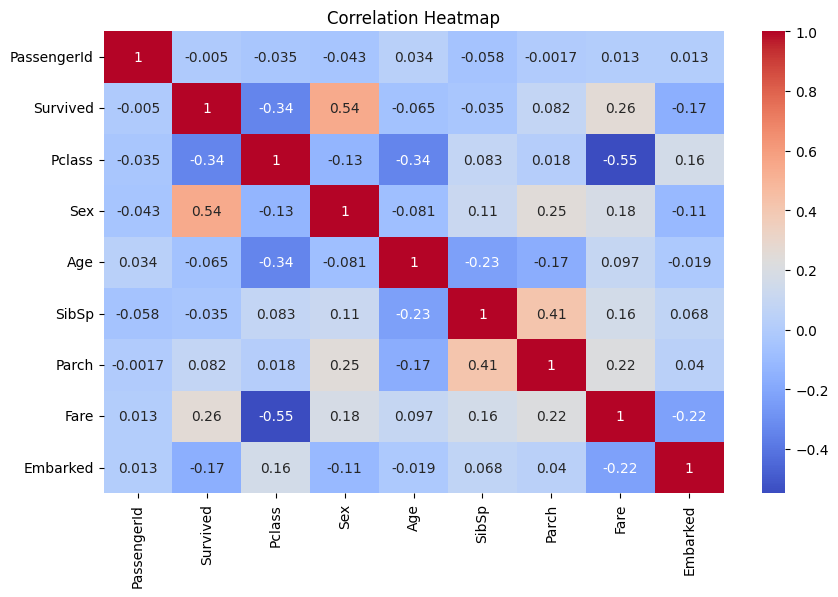

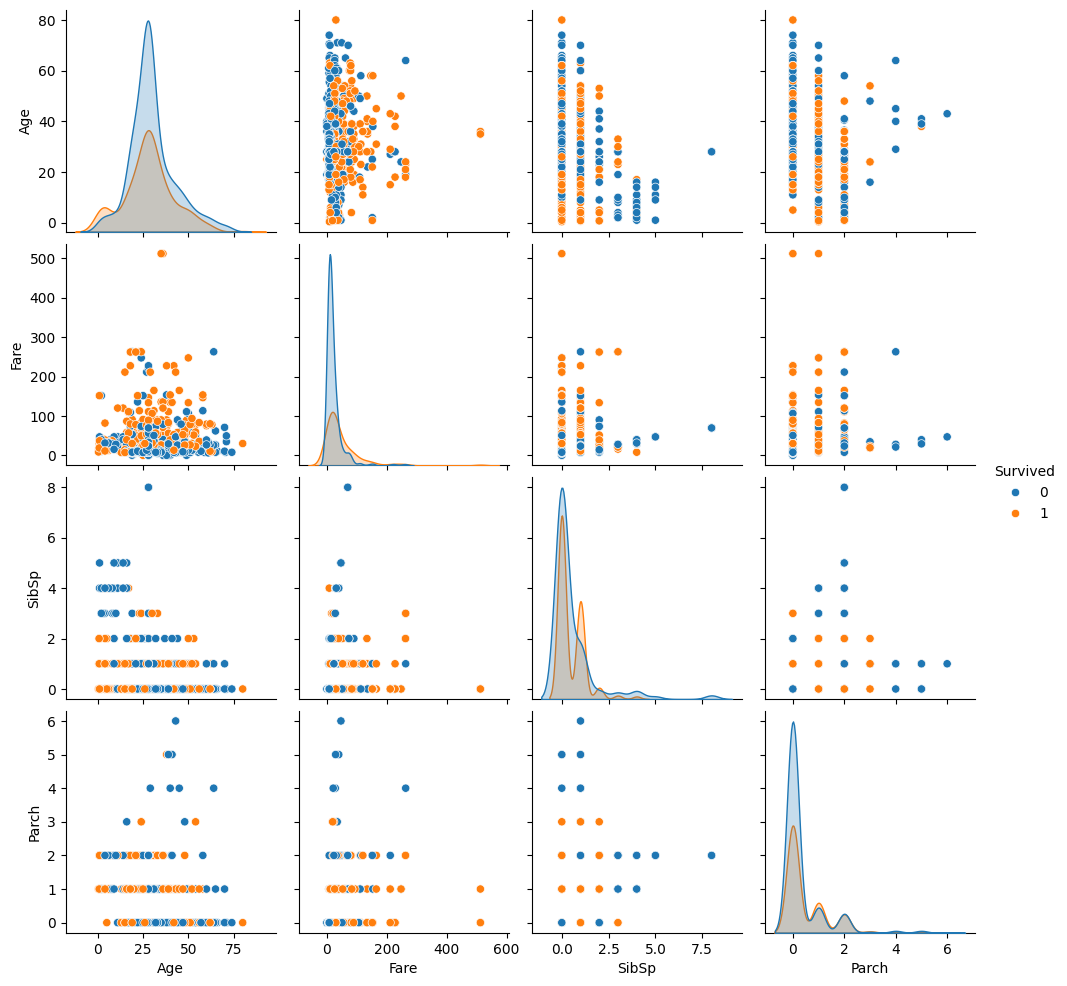


Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

----- Observations -----
1. Females had higher survival rates than males.
2. First-class passengers had higher survival than 2nd and 3rd class.
3. Higher fare passengers tended to survive more.
4. Large families (SibSp + Parch) had slightly lower survival rates.
5. Most passengers boarded from 'S' port.


In [13]:
# ==============================
# TITANIC EDA 
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
titanic = pd.read_csv(r"C:\Users\Muktha\OneDrive\Documents\train.csv")

# ------------------------------
# 1️⃣ Data Overview
# ------------------------------
print("----- Data Info -----")
print(titanic.info())

print("\n----- Summary Statistics -----")
print(titanic.describe())

print("\n----- Value Counts -----")
print(titanic['Sex'].value_counts())
print(titanic['Embarked'].value_counts())

# ------------------------------
# 2️⃣ Handle Missing Values
# ------------------------------
# Fill missing values safely
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Drop columns with too many missing or irrelevant for EDA
titanic.drop(columns=['Cabin'], inplace=True)

# ------------------------------
# 3️⃣ Encode categorical variables
# ------------------------------
titanic_encoded = titanic.copy()
titanic_encoded['Sex'] = titanic_encoded['Sex'].map({'male': 0, 'female': 1})
titanic_encoded['Embarked'] = titanic_encoded['Embarked'].map({'C':0, 'Q':1, 'S':2})

# ------------------------------
# 4️⃣ Univariate Analysis
# ------------------------------
# Histograms
plt.figure(figsize=(8,4))
titanic['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,4))
titanic['Fare'].hist(bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title("Age vs Pclass")
plt.show()

# Categorical counts
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title("Survival by Pclass")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title("Survival by Sex")
plt.show()

# ------------------------------
# 5️⃣ Bivariate / Correlation Analysis
# ------------------------------
# Select numeric columns only
numeric_cols = titanic_encoded.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(titanic_encoded, vars=['Age','Fare','SibSp','Parch'], hue='Survived')
plt.show()

# Survival rates by category
print("\nSurvival rate by Pclass:\n", titanic.groupby('Pclass')['Survived'].mean())
print("\nSurvival rate by Sex:\n", titanic.groupby('Sex')['Survived'].mean())
print("\nSurvival rate by Embarked:\n", titanic.groupby('Embarked')['Survived'].mean())

# ------------------------------
# 6️⃣ Summary Observations
# ------------------------------
print("\n----- Observations -----")
print("1. Females had higher survival rates than males.")
print("2. First-class passengers had higher survival than 2nd and 3rd class.")
print("3. Higher fare passengers tended to survive more.")
print("4. Large families (SibSp + Parch) had slightly lower survival rates.")
print("5. Most passengers boarded from 'S' port.")
